In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
boston = datasets.load_boston()

In [0]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:** 

 :Number of Instances: 506 

 :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

 :Attribute Information (in order):
 - CRIM per capita crime rate by town
 - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS proportion of non-retail business acres per town
 - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX nitric oxides concentration (parts per 10 million)
 - RM average number of rooms per dwelling
 - AGE proportion of owner-occupied units built prior to 1940
 - DIS weighted distances to five Boston employment centres
 - RAD index of accessibility to radial highways
 - TAX full-value property-tax rate per $10,000
 - PTRATIO pupil-teacher ratio by town
 - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT % lower status of the population
 - MEDV Median value of owner-occupied homes in $1000's

 :Missing Attribute Values: None

 :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980. N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems. 
 
.. topic:: References

 - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
 - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

In [0]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

print(bos.head())

CRIM ZN INDUS CHAS NOX ... TAX PTRATIO B LSTAT PRICE
0 0.00632 18.0 2.31 0.0 0.538 ... 296.0 15.3 396.90 4.98 24.0
1 0.02731 0.0 7.07 0.0 0.469 ... 242.0 17.8 396.90 9.14 21.6
2 0.02729 0.0 7.07 0.0 0.469 ... 242.0 17.8 392.83 4.03 34.7
3 0.03237 0.0 2.18 0.0 0.458 ... 222.0 18.7 394.63 2.94 33.4
4 0.06905 0.0 2.18 0.0 0.458 ... 222.0 18.7 396.90 5.33 36.2

[5 rows x 14 columns]

In [0]:
print(bos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 CRIM 506 non-null float64
 1 ZN 506 non-null float64
 2 INDUS 506 non-null float64
 3 CHAS 506 non-null float64
 4 NOX 506 non-null float64
 5 RM 506 non-null float64
 6 AGE 506 non-null float64
 7 DIS 506 non-null float64
 8 RAD 506 non-null float64
 9 TAX 506 non-null float64
 10 PTRATIO 506 non-null float64
 11 B 506 non-null float64
 12 LSTAT 506 non-null float64
 13 PRICE 506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB
None

In [0]:
print(bos.describe().transpose())

count mean std ... 50% 75% max
CRIM 506.0 3.613524 8.601545 ... 0.25651 3.677083 88.9762
ZN 506.0 11.363636 23.322453 ... 0.00000 12.500000 100.0000
INDUS 506.0 11.136779 6.860353 ... 9.69000 18.100000 27.7400
CHAS 506.0 0.069170 0.253994 ... 0.00000 0.000000 1.0000
NOX 506.0 0.554695 0.115878 ... 0.53800 0.624000 0.8710
RM 506.0 6.284634 0.702617 ... 6.20850 6.623500 8.7800
AGE 506.0 68.574901 28.148861 ... 77.50000 94.075000 100.0000
DIS 506.0 3.795043 2.105710 ... 3.20745 5.188425 12.1265
RAD 506.0 9.549407 8.707259 ... 5.00000 24.000000 24.0000
TAX 506.0 408.237154 168.537116 ... 330.00000 666.000000 711.0000
PTRATIO 506.0 18.455534 2.164946 ... 19.05000 20.200000 22.0000
B 506.0 356.674032 91.294864 ... 391.44000 396.225000 396.9000
LSTAT 506.0 12.653063 7.141062 ... 11.36000 16.955000 37.9700
PRICE 506.0 22.532806 9.197104 ... 21.20000 25.000000 50.0000

[14 rows x 8 columns]

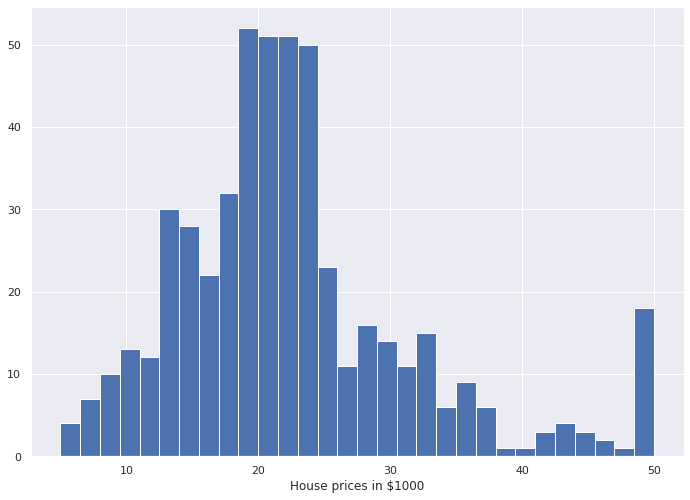

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

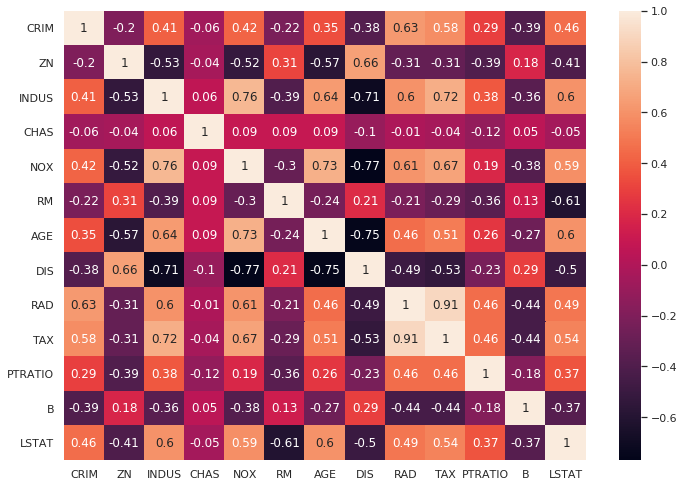

In [0]:
bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

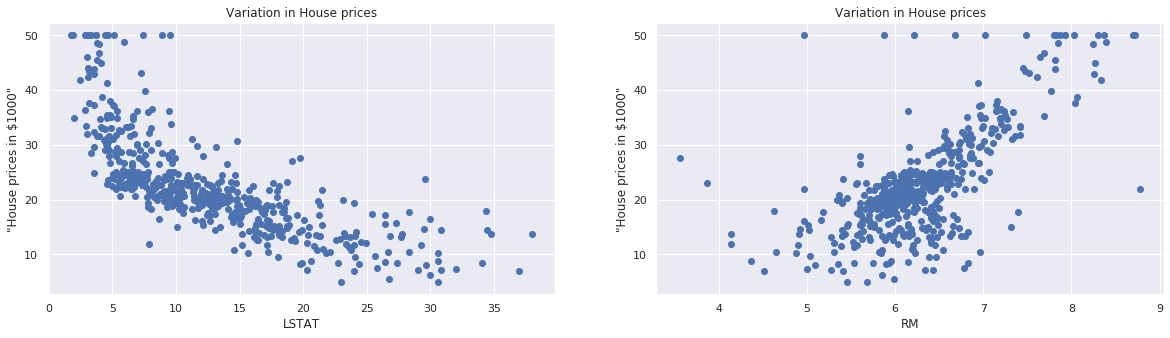

In [0]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bos['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [0]:
scaler = StandardScaler()
X = scaler.fit_transform(X_rooms)
X_train, X_test, Y_train, Y_test = train_test_split(X, y_price, test_size = 0.3, random_state=5)

# Lasso Regression

In [0]:
alpha_lasso = [0.10, 1.00, 2.00, 4.00, 5.00]

for alpha in alpha_lasso:
  model_Lasso = Lasso(alpha=alpha)
  model_Lasso.fit(X_train, Y_train)

  y_train_predict = model_Lasso.predict(X_train)
  rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
  r2 = round(model_Lasso.score(X_train, Y_train),2)

  print("The model performance for training set with alpha = {}".format(alpha))
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

The model performance for training set with alpha = 0.1
--------------------------------------
RMSE is 6.50764524330584
R2 score is 0.47


The model performance for training set with alpha = 1.0
--------------------------------------
RMSE is 6.5850773953020445
R2 score is 0.46


The model performance for training set with alpha = 2.0
--------------------------------------
RMSE is 6.814349456287915
R2 score is 0.42


The model performance for training set with alpha = 4.0
--------------------------------------
RMSE is 7.663146570018428
R2 score is 0.26


The model performance for training set with alpha = 5.0
--------------------------------------
RMSE is 8.242581997436577
R2 score is 0.15

In [0]:
best_model_Lasso = LassoCV(alphas=alpha_lasso)
Model_Lasso_alpha = best_model_Lasso.fit(X_train, Y_train)
print("best alpha for the Lasso model is {}".format(Model_Lasso_alpha.alpha_))

/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
best alpha for the Lasso model is 0.1

# Ridge Regression

In [0]:
alpha_ridge = [10.00, 100.00, 200.00, 500.00, 1000.00]

for alpha in alpha_ridge:
  model_Ridge = Ridge(alpha=alpha)
  model_Ridge.fit(X_train, Y_train)

  y_train_predict = model_Ridge.predict(X_train)
  rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
  r2 = round(model_Ridge.score(X_train, Y_train),2)

  print("The model performance for training set with alpha = {}".format(alpha))
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

The model performance for training set with alpha = 10.0
--------------------------------------
RMSE is 6.515714131425511
R2 score is 0.47


The model performance for training set with alpha = 100.0
--------------------------------------
RMSE is 6.8899059373203
R2 score is 0.41


The model performance for training set with alpha = 200.0
--------------------------------------
RMSE is 7.299083357940729
R2 score is 0.33


The model performance for training set with alpha = 500.0
--------------------------------------
RMSE is 7.950004903906233
R2 score is 0.21


The model performance for training set with alpha = 1000.0
--------------------------------------
RMSE is 8.349674841756892
R2 score is 0.13

In [0]:
best_model_Ridge = RidgeCV(alphas=alpha_ridge)
Model_Ridge_alpha = best_model_Ridge.fit(X_train, Y_train)
print("best alpha for the Ridge model is {}".format(Model_Ridge_alpha.alpha_))

best alpha for the Ridge model is 10.0